In [ ]:
# First set

import numpy as np
from PIL import Image
import os

tempcount = 0
for filename in os.listdir(os.curdir):
    if filename.endswith(".jpg"):        
        # Convert to binary image by converting to grayscale and threshold
        original_image = np.array(Image.open(filename).convert('L'))
        thresh = 80
        original_image_array = (original_image < thresh) * 255 # Inverse the value of 255 and 0


        # Bounding box
        x,y = np.where(original_image_array) # Get list of x and y values > 0
        x_max, x_min, y_max, y_min = x.max(), x.min(), y.max(), y.min()
        clipped_image = original_image_array[x_min:x_max,y_min:y_max]
        Image.fromarray(np.uint8(clipped_image)).save('temp-clip.jpg')


        # Resize and interpolate to 20 x 20
        clipped_image = Image.open('temp-clip.jpg')

        # Resize along with aspect ratio and use bicubic interpolation
        im_thumbnail = clipped_image.thumbnail((20, 20),Image.BICUBIC)
        width, height= clipped_image.size[0], clipped_image.size[1]
        padded_image = Image.new("L", (20, 20))
        offset_x = (20 - width) // 2
        offset_y = (20 - height) // 2
        padded_image.paste(clipped_image, (offset_x, offset_y))


        # Find Center of Mass
        m00 = np.count_nonzero(padded_image)
        padded_image_array = np.array(padded_image)

        m10 = 0 # x
        m01 = 0 # y
        for i in range(20):
            for j in range(20):
                if padded_image_array[i][j] > 0:
                    m10 += j
                    m01 += i

        com_x, com_y = m10//m00, m01//m00


        # Translate to 28x28 image using Center of Mass
        final_image = Image.new("L", (28, 28))
        final_image.paste(padded_image, (13-com_y, 13-com_x)) # the middle is index 13.5
        name, ext = os.path.splitext(filename)
        path = os.path.join(os.getcwd(), "idata/")
        Image.fromarray(np.uint8(final_image)).save(path + name + ".png")
        #display(final_image)

In [341]:
# Second set

import numpy as np
from PIL import Image
import os
from skimage.morphology import dilation, disk

tempcount = 0
for filename in os.listdir(os.curdir):
    if filename.endswith(".jpg"):
        
        # Convert to binary image by converting to grayscale and threshold
        original_image = np.array(Image.open(filename).convert('L'))
        thresh = 80
        original_image_array = (original_image < thresh) * 255 # Inverse the value of 255 and 0


        # Bounding box
        x,y = np.where(original_image_array) # Get list of x and y values > 0
        x_max, x_min, y_max, y_min = x.max(), x.min(), y.max(), y.min()
        clipped_image = original_image_array[x_min:x_max,y_min:y_max]
        
        # Morphology using Dilation
        selem = disk(4)
        dilated = dilation(clipped_image, selem)
        Image.fromarray(np.uint8(dilated)).save('temp-clip.jpg')

        # Resize and interpolate to 20 x 20
        clipped_image = Image.open('temp-clip.jpg')

        # Resize along with aspect ratio and use bicubic interpolation
        im_thumbnail = clipped_image.thumbnail((20, 20),Image.BICUBIC)
        width, height= clipped_image.size[0], clipped_image.size[1]
        padded_image = Image.new("L", (20, 20))
        offset_x = (20 - width) // 2
        offset_y = (20 - height) // 2
        padded_image.paste(clipped_image, (offset_x, offset_y))


        # Find Center of Mass
        m00 = np.count_nonzero(padded_image)
        padded_image_array = np.array(padded_image)

        m10 = 0 # x
        m01 = 0 # y
        for i in range(20):
            for j in range(20):
                if padded_image_array[i][j] > 0:
                    m10 += j
                    m01 += i

        com_x, com_y = m10//m00, m01//m00


        # Translate to 28x28 image using Center of Mass
        final_image = Image.new("L", (28, 28))
        final_image.paste(padded_image, (13-com_y, 13-com_x)) # the middle is index 13.5
        name, ext = os.path.splitext(filename)
        path = os.path.join(os.getcwd(), "idata2/")
        Image.fromarray(np.uint8(final_image)).save(path + name + ".png")
        #display(final_image)

In [ ]:
import numpy as np
from PIL import Image

In [310]:
# Convert to binary image by converting to grayscale and threshold

original_image = np.array(Image.open('img15.jpg').convert('L'))

thresh = 80

original_image_array = (original_image < thresh) * 255 # Inverse the value of 255 and 0

# Image.fromarray(np.uint8(original_image_array)).save('delete.jpg')

In [317]:
# Bounding box

#display(Image.open('delete.jpg'))
x,y = np.where(original_image_array) # Get list of x and y values > 0
x_max, x_min, y_max, y_min = x.max(), x.min(), y.max(), y.min()
# print(x_max - x_min)
#bounded = np.zeros(((y_max - y_min),(x_max - x_min)))
#print(bounded.shape)
# print(y_max, y_min, x_max, x_min)
clipped_image = original_image_array[x_min:x_max,y_min:y_max]
#print(clipped_image)
Image.fromarray(np.uint8(clipped_image)).save('delete-clip.jpg')

In [318]:
from skimage.morphology import dilation, disk
selem = disk(3)
dilated = dilation(clipped_image, selem)
print(dilated)
Image.fromarray(np.uint8(dilated)).save('delete-dilate.jpg')

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255   0   0]]


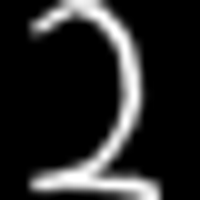

In [266]:
# Resize and interpolate to 20 x 20

clipped_image = Image.open('temp-clip.jpg')
#display(clip)

# Resize along with aspect ratio and use bicubic interpolation
im_thumbnail = clipped_image.thumbnail((20, 20),Image.BICUBIC)
display(clipped_image)

width, height= clipped_image.size[0], clipped_image.size[1]
#print(height)
padded_image = Image.new("L", (20, 20))
offset_x = (20 - width) // 2
#print(offset_x)
offset_y = (20 - height) // 2
#print(offset_y)

padded_image.paste(clipped_image, (offset_x, offset_y))
display(padded_image)
#Image.fromarray(np.uint8(padded_image)).save('delete-padded.jpg')

padded_image_resized = padded_image.resize((200, 200))
display(padded_image_resized)

In [318]:
from skimage.morphology import dilation, disk
selem = disk(3)
dilated = dilation(clipped_image, selem)
print(dilated)
Image.fromarray(np.uint8(dilated)).save('delete-dilate.jpg')

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255   0   0]]


In [267]:
# Find Center of Mass

m00 = np.count_nonzero(padded_image)
print(m00)

padded_image_array = np.array(padded_image)
print(padded_image_array)

print(padded_image_array[0][8])

m10 = 0 # x
m01 = 0 # y
for i in range(20):
    for j in range(20):
        if padded_image_array[i][j] > 0:
            m10 += j
            m01 += i

print(m10, m01)

com_x, com_y = m10//m00, m01//m00
print(com_x, com_y)

111
[[  0   0   0   0   0  46 162 220 233 207  81   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  97 240 215 109 177 251 242  69   0   0   0   0   0   0
    0   0]
 [  0   0   0 134 233 111  12   0   0  62 223 236  59   0   0   0   0   0
    0   0]
 [  0   0   0  58  36   0   0   0   0   0  72 251 205  11   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 132 255  80   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  34 249 142   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 230 192   3   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2 191 237  19   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 169 244  26   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 142 255  37   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 181 236  25   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16 237 171   0

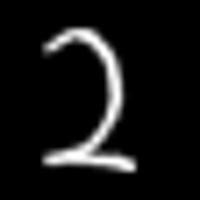

In [268]:
# Translate to 28x28 image using Center of Mass

final_image = Image.new("L", (28, 28))
final_image.paste(padded_image, (13-com_y, 13-com_x)) # the middle is index 13.5
display(final_image)
Image.fromarray(np.uint8(final_image)).save('delete-final.jpg')

final_image_resized = final_image.resize((200, 200))
display(final_image_resized)